# How to Summarize Data in Python
## (Based on the LinkedIn Learning Course Machine Learning with Python: Foundations by Frederick Nwanganga)

## Learning Objectives
When exploring data, one of the most important things we can do is summarize it so we can better understand it. A common way to summarize data is by computing aggregations such as mean, median, maximum and minimum. These aggregations or statistical measures (as they are commonly referred to) describe the general and specific characteristics of our data. This is why these types of aggregations are sometimes referred to as **descriptive statistics** or **summary statistics**. The pandas DataFrame provides several methods for computing descriptive statistics. By the end of this tutorial, you will have learned:
+ how to get high level descriptive info on a DataFrame
+ how to describe a DataFrame
+ how to get simple aggregations
+ how to get group-level aggregations
+ how to do a box plot with the DataFrame data
+ how to do a scatter plot with the DataFrame data

## How to Describe a DataFrame

In [1]:
import pandas as pd
irisData_df = pd.read_csv("irisData_modified.csv")
envData_df = pd.read_csv("seth_environmentalData_march2023.csv")
dateFruitData_df = pd.read_csv("DateFruitData_kaggle.csv")

In [2]:
irisData_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   septalLength_cm  150 non-null    float64
 1   septalWidth_cm   149 non-null    float64
 2   petalLength_mm   150 non-null    int64  
 3   petalWidth_cm    150 non-null    float64
 4   type             150 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 6.0+ KB


In [3]:
# try the describe() method on the irisData_df; which column has a missing value and which is scaled differently?
irisData_df.describe()

,septalLength_cm,septalWidth_cm,petalLength_mm,petalWidth_cm
count,150.000000,149.000000,150.000000,150.000000
mean,5.843333,3.054362,37.586667,1.198667
std,0.828066,0.435034,17.644204,0.763161
min,4.300000,2.000000,10.000000,0.100000
25%,5.100000,2.800000,16.000000,0.300000
50%,5.800000,3.000000,43.500000,1.300000
75%,6.400000,3.300000,51.000000,1.800000
max,7.900000,4.400000,69.000000,2.500000


## How to get Simple Aggregations
The `describe()` method returns a statistical summary for each of the columns in a DataFrame. It's important to note that the descriptive statistics returned by the `describe()` method depends on the data type of a column. For non-numeric columns, the descriptive statistics returned by the method are as follows:

|Name      |   Description  |
|-----------------|---------------------|
| `count`         | Number of non-missing values                       |
| `unique`       | Number of unique non-missing values                   |
| `top`       | Most commonly occuring value   |
| `freq`        | Frequency of the most commonly occuring value                   |


For numeric columns, the `describe()` method returns the following descriptive statistics:

|Name      |   Description  |
|-----------------|---------------------|
| `count`         | Number of non-missing values                       |
| `mean`       | Average of the non-missing values                   |
| `std`       | Standard deviation of the values   |
| `min`        | Smallest value                  |
| `25%`         | 25th percentile                       |
| `50%`       | 50th percentile (same as the median)                   |
| `75%`       | 75th percentile   |
| `max`        | Largest value                   |


In [4]:
# try the head() method on the irisData_df
irisData_df.head()

,septalLength_cm,septalWidth_cm,petalLength_mm,petalWidth_cm,type
0,5.1,3.5,14,0.2,setosa
1,4.9,3.0,14,0.2,setosa
2,4.7,3.2,13,0.2,setosa
3,4.6,3.1,15,0.2,setosa
4,5.0,3.6,14,0.2,setosa


In [5]:
# try using the describe() method on the irisData_df with the "type" column to get statistics on non-numeric data
irisData_df['type'].describe()

count        150
unique         3
top       setosa
freq          50
Name: type, dtype: object

In [6]:
# Look at the value_counts() method on the "type" column of the irisData_df
irisData_df["type"].value_counts()

type
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
# Get a statistical description of the envData_df DataFrame
envData_df.describe()

,SiteN,State,DO,pH,avg_WW,avg_Depth,pflow_Pool,pflow_Run,pflow_Riffle,pbottom_Mud,...,pbottom_Boulder,pbottom_Bedrock,pfloat_macrophytes,pfloat_wood,upstreamCumDA_km2,slopePercent,avgMonthFlow_cfs,CV_flow,maxMonthFlow_cfs,minMonthFlow_cfs
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,23.500000,1.260870,8.454348,7.494783,6.805104,30.163171,30.367495,43.447206,26.185300,43.734783,...,6.886957,7.932609,66.858178,41.966874,127.268587,0.370652,39.587210,0.674216,82.091304,9.935000
std,13.422618,0.443961,2.927851,0.589662,4.146390,12.714785,22.694289,22.330618,15.266217,35.235772,...,10.680525,17.427884,31.302039,32.380580,226.972376,0.381083,69.059513,0.035755,143.351637,17.802485
min,1.000000,1.000000,4.200000,6.050000,2.533330,4.583330,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.632000,0.010000,1.106667,0.584495,2.160000,0.280000
25%,12.250000,1.000000,6.800000,7.227500,4.164580,21.312500,16.666670,33.333330,16.666670,9.000000,...,0.000000,0.000000,50.000000,16.666667,14.561000,0.117500,3.892292,0.661093,8.120000,1.012500
50%,23.500000,1.000000,7.700000,7.530000,6.211900,27.208330,33.333330,33.333333,33.333330,40.850000,...,2.100000,0.000000,66.666667,36.666667,43.620000,0.285000,12.476667,0.675903,25.915000,2.930000
75%,34.750000,1.750000,9.900000,7.755000,7.830830,39.093750,50.000000,66.666669,33.333330,80.850000,...,8.100000,4.575000,100.000000,66.666667,100.393000,0.417500,28.313333,0.689149,62.610000,7.562500
max,46.000000,2.000000,18.600000,9.600000,22.000000,60.333330,100.000000,83.333333,50.000000,100.000000,...,36.700000,78.300000,100.000000,100.000000,1093.994000,2.060000,326.149167,0.785483,678.260000,84.030000


In [8]:
# Look at the value_counts() method on the "pflow_Riffle" column of the envData_df
envData_df["pflow_Riffle"].value_counts()

pflow_Riffle
33.333330    16
16.666670     9
0.000000      7
50.000000     6
33.333333     2
16.666667     2
20.000000     1
25.000000     1
42.857143     1
33.333333     1
Name: count, dtype: int64

In [9]:
# Compare with value_counts(normalize = True)
envData_df["pflow_Riffle"].value_counts(normalize = True)

pflow_Riffle
33.333330    0.347826
16.666670    0.195652
0.000000     0.152174
50.000000    0.130435
33.333333    0.043478
16.666667    0.043478
20.000000    0.021739
25.000000    0.021739
42.857143    0.021739
33.333333    0.021739
Name: proportion, dtype: float64

## How to get Group-level Statistics & Aggregations

In [10]:
# Group the iris data by "type" and compare the petalWidth_cm mean values for each of the three types
irisData_df.groupby('type')[['petalWidth_cm']].mean()

,petalWidth_cm
type,
setosa,0.244
versicolor,1.326
virginica,2.026


In [11]:
# Group the env data by "State" and compare which state has the most mud in the streams (pbottom_Mud)
envData_df.groupby('State')[['pbottom_Mud']].mean()

,pbottom_Mud
State,
1,55.185294
2,11.291667


In [12]:
# Get info for the dateFruitData_df data
dateFruitData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [13]:
# Get a statistical description of the dateFruitData_df numerical columns
dateFruitData_df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091220e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [14]:
# Group the data fruit data by "Class" and compare the MAJOR_AXIS
dateFruitData_df.groupby('Class')[['MAJOR_AXIS']].mean()
dateFruitData_df['MINOR_AXIS'].kurtosis()

-0.6396927081175434

In [15]:
# Group the data fruit data by "Class" and compare the MAJOR_AXIS, but use mean().sort_values(by = 'MAJOR_AXIS')
dateFruitData_df.groupby('Class')[['MAJOR_AXIS']].mean().sort_values(by = 'MAJOR_AXIS')

,MAJOR_AXIS
Class,
DOKOL,537.843773
DEGLET,680.222427
SOGAY,755.978483
BERHI,815.370329
ROTANA,832.475543
IRAQI,836.104518
SAFAVI,881.385573


In [16]:
# Now get aggregate statistics using .agg(['mean','median','min','max']) instead of .mean()
dateFruitData_df.groupby('Class')[['MAJOR_AXIS']].agg(['mean','median','min','max'])

MAJOR_AXIS                                
              mean     median       min        max
Class                                             
BERHI   815.370329  818.81460  715.4261   940.7379
DEGLET  680.222427  668.26630  535.5590   875.3194
DOKOL   537.843773  545.49235  336.7227   733.3027
IRAQI   836.104518  837.47310  713.5856   953.5176
ROTANA  832.475543  833.58560  681.3436   943.8856
SAFAVI  881.385573  884.11440  722.8275  1222.7230
SOGAY   755.978483  754.94090  622.2163   953.8370

## Some Data Visualization Methods from the Pandas DataFrame

In [17]:
# Now we will look at some visualization methods
%matplotlib inline

<Axes: title={'center': 'MINOR_AXIS'}, xlabel='Class'>

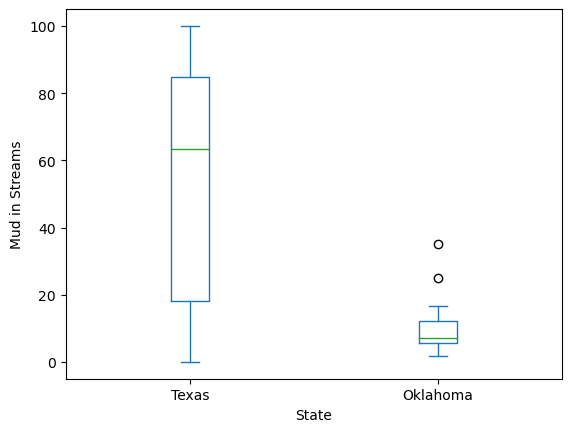

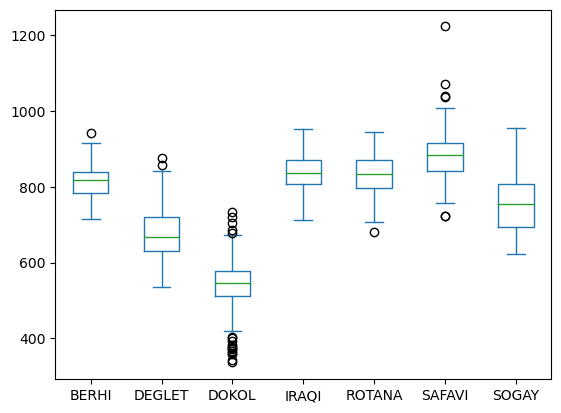

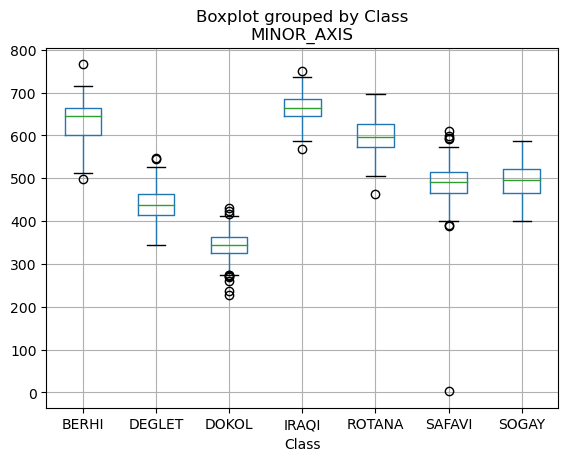

In [18]:
# Example box plot
envData_df.pivot(columns = 'State', values = 'pbottom_Mud').plot(kind = 'box')
import matplotlib.pyplot as plt
plt.ylabel('Mud in Streams')
plt.xlabel('State')
plt.xticks([1,2], ['Texas', 'Oklahoma'])

# Now try comparing the MAJOR_AXIS for the dateFruitData_df Class
dateFruitData_df.pivot(columns = 'Class', values = 'MAJOR_AXIS').plot(kind = 'box')
dateFruitData_df.boxplot(column = 'MINOR_AXIS', by = 'Class')

<Axes: xlabel='MAJOR_AXIS', ylabel='AREA'>

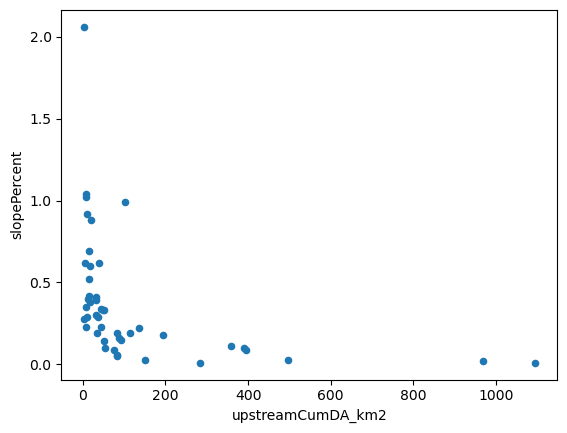

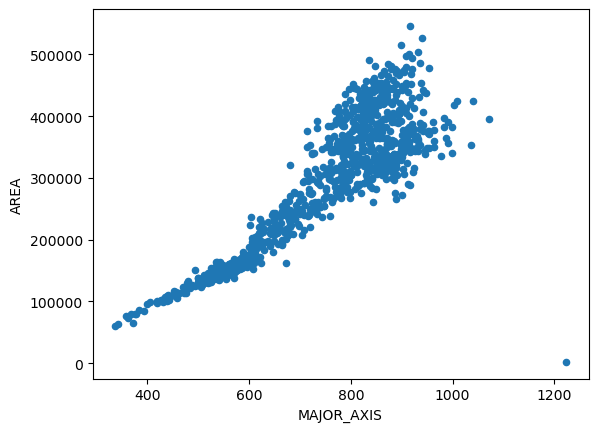

In [19]:
# Example scatter plot
envData_df.plot(kind = 'scatter', x = 'upstreamCumDA_km2', y = 'slopePercent')
# Now try comparing a scatter plot of the date fruit data MAJOR_AXIS (x-axis) vs. AREA (y-axis)
dateFruitData_df.plot(kind = 'scatter', x = 'MAJOR_AXIS', y = 'AREA')

<Axes: ylabel='Frequency'>

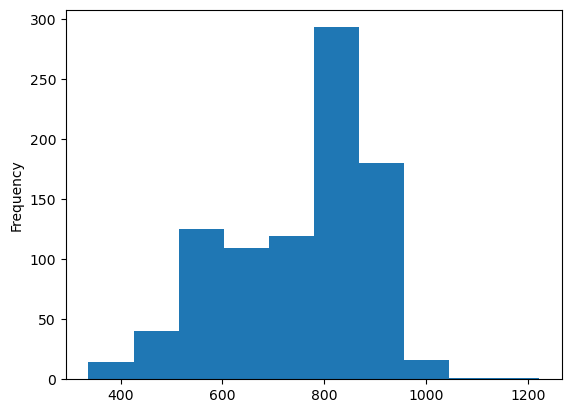

In [20]:
# Histogram plot of the date fruit data MAJOR_AXIS (x-axis)
dateFruitData_df['MAJOR_AXIS'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

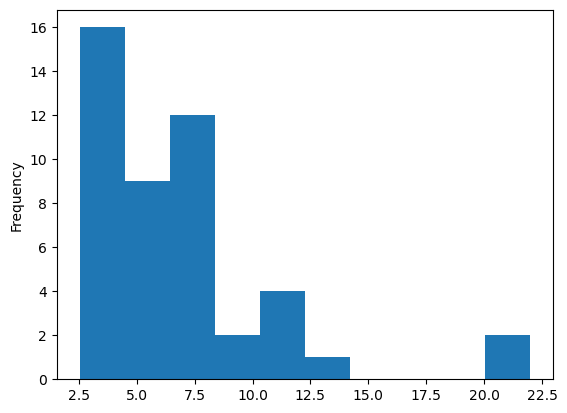

In [21]:
# Now try a histogram of the avg_WW from the fish environmental data
envData_df['avg_WW'].plot(kind = 'hist')